# Лабораторная работа №5,  Компьютерная геометрия и геометрическое моделирование
- Ф.И.О: **Яссин Мохамад Аламин**.
- Ноиер студ. билета: **1032205004**.
- Группа: **НКНбд-01-20**.

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, RegularPolygon
import numpy as np

## №1
Перспетивные проекции

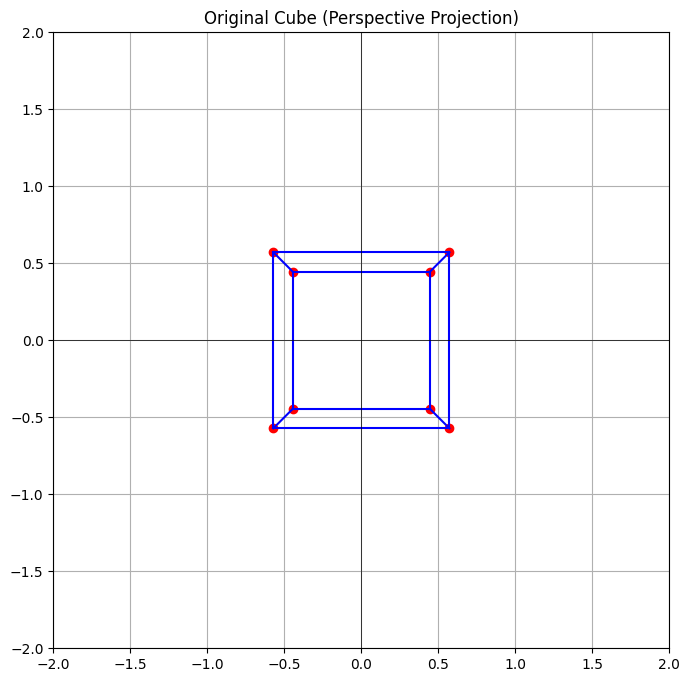

In [ ]:
import numpy as np

def create_cube():
    """Create a unit cube."""
    vertices = np.array([
        [-0.5, -0.5, -0.5],  # 0
        [0.5, -0.5, -0.5],   # 1
        [0.5, 0.5, -0.5],    # 2
        [-0.5, 0.5, -0.5],   # 3
        [-0.5, -0.5, 0.5],   # 4
        [0.5, -0.5, 0.5],    # 5
        [0.5, 0.5, 0.5],     # 6
        [-0.5, 0.5, 0.5]     # 7
    ])

    edges = [
        [0, 1],
        [1, 2],
        [2, 3],
        [3, 0],
        [0, 4],
        [1, 5],
        [2, 6],
        [3, 7],
        [4, 5],
        [5, 6],
        [6, 7],
        [7, 4]
    ]

    return vertices, edges


# Test the function
vertices, edges = create_cube()
vertices, edges
def translate(vertices, dx, dy, dz):
    """Translate vertices by dx, dy, dz."""
    translation_matrix = np.array([
        [1, 0, 0, dx],
        [0, 1, 0, dy],
        [0, 0, 1, dz],
        [0, 0, 0, 1]
    ])

    # Add a fourth dimension to the vertices for homogeneous coordinates
    homogeneous_vertices = np.hstack([vertices, np.ones((vertices.shape[0], 1))])
    translated_vertices = np.dot(homogeneous_vertices, translation_matrix.T)

    # Remove the fourth dimension to get back to 3D coordinates
    return translated_vertices[:, :3]

# Test the function with a translation of (0.5, 0.5, 0.5)
translated_vertices = translate(vertices, 0.5, 0.5, 0.5)
translated_vertices

def perspective_projection(vertices, r):
    """Apply one-point perspective projection with coefficient r to vertices."""
    projected_x = vertices[:, 0] / (vertices[:, 2] * r + 1)
    projected_y = vertices[:, 1] / (vertices[:, 2] * r + 1)

    # Combine the x and y projections into a single array
    projected_vertices = np.vstack([projected_x, projected_y]).T
    return projected_vertices

# Test the function with r = -0.25
projected_vertices = perspective_projection(vertices, -0.25)
projected_vertices


def plot_cube(vertices, edges, title="Cube"):
    """Plot the cube defined by vertices and edges."""
    plt.figure(figsize=(8, 8))
    for edge in edges:
        plt.plot([vertices[edge[0], 0], vertices[edge[1], 0]],
                 [vertices[edge[0], 1], vertices[edge[1], 1]], 'b-')
    plt.scatter(vertices[:, 0], vertices[:, 1], c='r')
    plt.title(title)
    plt.grid(True)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.show()

# Plot the original cube
plot_cube(projected_vertices, edges, "Original Cube (Perspective Projection)")


In [ ]:
def rotate_around_x(vertices, theta):
    """Rotate vertices around the x-axis by angle theta."""
    rotation_matrix = np.array([
        [1, 0, 0],
        [0, np.cos(theta), -np.sin(theta)],
        [0, np.sin(theta), np.cos(theta)]
    ])

    rotated_vertices = np.dot(vertices, rotation_matrix.T)
    return rotated_vertices

def rotate_around_y(vertices, theta):
    """Rotate vertices around the y-axis by angle theta."""
    rotation_matrix = np.array([
        [np.cos(theta), 0, np.sin(theta)],
        [0, 1, 0],
        [-np.sin(theta), 0, np.cos(theta)]
    ])

    rotated_vertices = np.dot(vertices, rotation_matrix.T)
    return rotated_vertices

# Test the functions with a 45-degree rotation around both axes
vertices_rotated_x = rotate_around_x(vertices, np.pi / 4)
vertices_rotated_y = rotate_around_y(vertices, np.pi / 4)

vertices_rotated_x, vertices_rotated_y


(array([[-5.00000000e-01, -5.55111512e-17, -7.07106781e-01],
        [ 5.00000000e-01, -5.55111512e-17, -7.07106781e-01],
        [ 5.00000000e-01,  7.07106781e-01, -5.55111512e-17],
        [-5.00000000e-01,  7.07106781e-01, -5.55111512e-17],
        [-5.00000000e-01, -7.07106781e-01,  5.55111512e-17],
        [ 5.00000000e-01, -7.07106781e-01,  5.55111512e-17],
        [ 5.00000000e-01,  5.55111512e-17,  7.07106781e-01],
        [-5.00000000e-01,  5.55111512e-17,  7.07106781e-01]]),
 array([[-7.07106781e-01, -5.00000000e-01, -5.55111512e-17],
        [ 5.55111512e-17, -5.00000000e-01, -7.07106781e-01],
        [ 5.55111512e-17,  5.00000000e-01, -7.07106781e-01],
        [-7.07106781e-01,  5.00000000e-01, -5.55111512e-17],
        [-5.55111512e-17, -5.00000000e-01,  7.07106781e-01],
        [ 7.07106781e-01, -5.00000000e-01,  5.55111512e-17],
        [ 7.07106781e-01,  5.00000000e-01,  5.55111512e-17],
        [-5.55111512e-17,  5.00000000e-01,  7.07106781e-01]]))

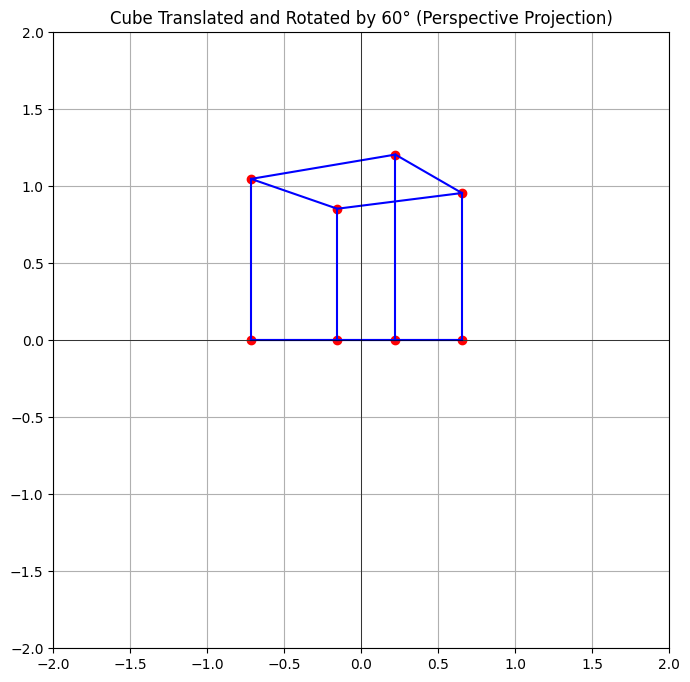

In [ ]:
# 1. Translate the cube upward by 0.5 along the Oy axis
translated_cube = translate(vertices, 0, 0.5, 0)

# 2. Rotate the cube around the Oy axis by 60 degrees
rotated_cube_60 = rotate_around_y(translated_cube, np.radians(60))

# 3. Apply perspective projection with r = -0.25
projected_cube_60 = perspective_projection(rotated_cube_60, -0.25)

# Plot the transformed cube
plot_cube(projected_cube_60, edges, "Cube Translated and Rotated by 60° (Perspective Projection)")

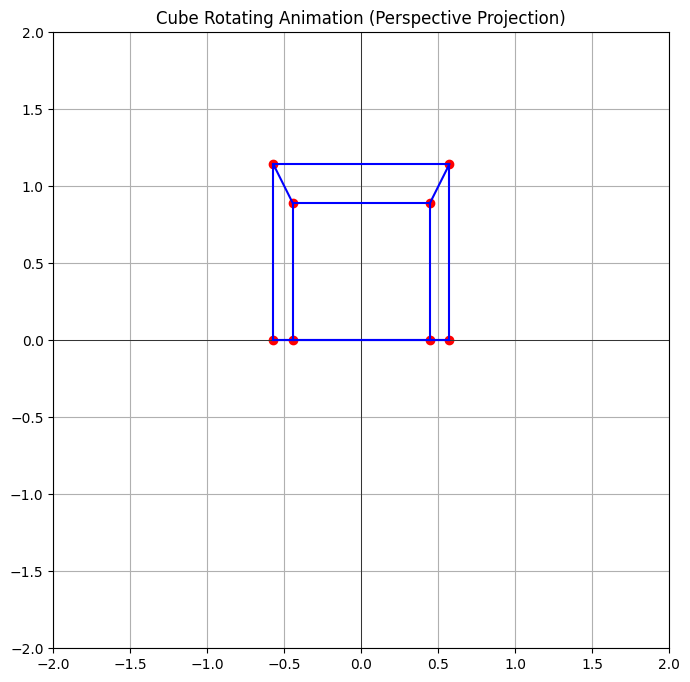

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Functions provided previously remain unchanged

def rotate_around_x(vertices, theta):
    """Rotate vertices around the x-axis by angle theta."""
    rotation_matrix = np.array([
        [1, 0, 0],
        [0, np.cos(theta), -np.sin(theta)],
        [0, np.sin(theta), np.cos(theta)]
    ])

    rotated_vertices = np.dot(vertices, rotation_matrix.T)
    return rotated_vertices

# Create a unit cube
vertices, edges = create_cube()

# Translate the cube upward by 0.5 along the Oy axis
translated_cube = translate(vertices, 0, 0.5, 0)

# Initialize the figure and axis
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_title("Cube Rotating Animation (Perspective Projection)")
ax.grid(True)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_aspect('equal', adjustable='box')

# Initialize the cube plot
lines = [ax.plot([], [], 'b-')[0] for _ in range(len(edges))]
scatters = ax.scatter([], [], c='r')

# Update function for the animation with rotations and translations around both axes
def update(frame):
    # Rotate the cube around the Oy and Ox axes
    rotated_cube_y = rotate_around_y(translated_cube, np.radians(frame))
    rotated_cube_x = rotate_around_x(rotated_cube_y, np.radians(frame))

    # Apply perspective projection with r = -0.25
    projected_cube = perspective_projection(rotated_cube_x, -0.25)

    # Update the cube plot
    for i, edge in enumerate(edges):
        lines[i].set_data([projected_cube[edge[0], 0], projected_cube[edge[1], 0]],
                          [projected_cube[edge[0], 1], projected_cube[edge[1], 1]])
    scatters.set_offsets(projected_cube[:, :2])
    return lines + [scatters]

# Create the animation
ani = FuncAnimation(fig, update, frames=np.linspace(0, 360, 360), blit=True)

# Display the animation
plt.show()


In [ ]:
# Save the animation as an MP4 video
mp4_path = "/content/sample_data/cube_rotation.mp4"
ani.save(mp4_path, writer='ffmpeg', fps=30)

mp4_path


'/content/sample_data/cube_rotation.mp4'

# No 2

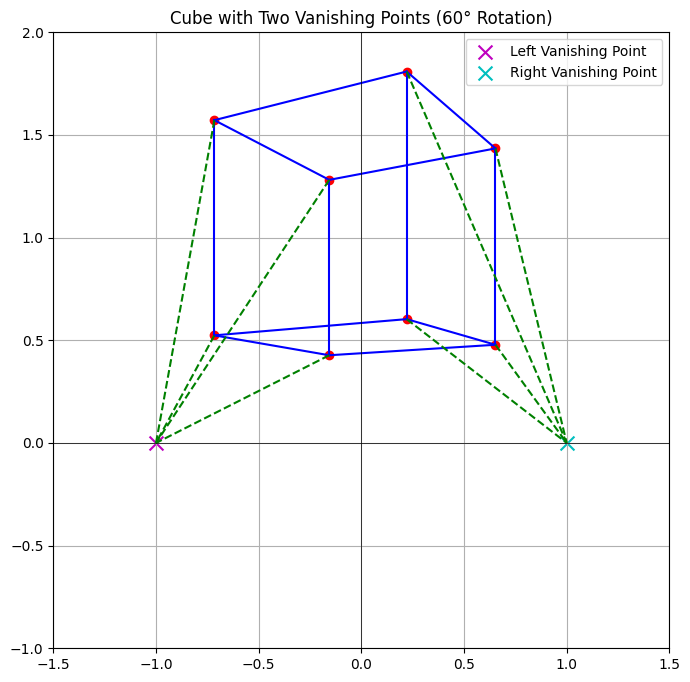

In [ ]:
def plot_cube_with_two_vanishing_points(vertices, edges, title="Cube with Two Vanishing Points"):
    """Plot the cube with two vanishing points and perspective lines."""
    plt.figure(figsize=(8, 8))

    # Plot cube edges
    for edge in edges:
        plt.plot([vertices[edge[0], 0], vertices[edge[1], 0]],
                 [vertices[edge[0], 1], vertices[edge[1], 1]], 'b-')

    # Determine the two vanishing points (assumed to be on the x-axis at y=0)
    vanishing_point_left = [-1, 0]
    vanishing_point_right = [1, 0]

    # Plot perspective lines from cube vertices to the vanishing points
    for vertex in vertices:
        if vertex[0] < 0:  # If the vertex is on the left side
            plt.plot([vertex[0], vanishing_point_left[0]], [vertex[1], vanishing_point_left[1]], 'g--')
        else:  # If the vertex is on the right side
            plt.plot([vertex[0], vanishing_point_right[0]], [vertex[1], vanishing_point_right[1]], 'g--')

    # Plot the vertices of the cube and the vanishing points
    plt.scatter(vertices[:, 0], vertices[:, 1], c='r')
    plt.scatter(vanishing_point_left[0], vanishing_point_left[1], c='m', marker='x', s=100, label="Left Vanishing Point")
    plt.scatter(vanishing_point_right[0], vanishing_point_right[1], c='c', marker='x', s=100, label="Right Vanishing Point")

    plt.title(title)
    plt.grid(True)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1, 2)
    plt.legend()
    plt.show()

# Translate the cube upward by 1 along the Oy axis
translated_cube_higher = translate(vertices, 0, 1, 0)

# Rotate the cube around the Oy axis by 60 degrees
rotated_cube_higher_60 = rotate_around_y(translated_cube_higher, np.radians(60))

# Apply perspective projection with r = -0.25
projected_cube_higher_60 = perspective_projection(rotated_cube_higher_60, -0.25)

# Plot the cube with the two vanishing points and perspective lines
plot_cube_with_two_vanishing_points(projected_cube_higher_60, edges, "Cube with Two Vanishing Points (60° Rotation)")


# № 3

In [ ]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Define the perspective transformation
def perspective_transform(x, y, z, p=0, q=0.2, r=-0.1):
    x_prime = (p + x/z) / (1 - q/z)
    y_prime = y / (1 - r/z)
    return x_prime, y_prime

# Plot the transformed parabola
def plot_parabola(q=0.2):
    # Define the x-values and compute y = x^2
    x = np.linspace(-2, 2, 400)
    y = x**2

    # Apply the perspective transformation
    x_transformed, y_transformed = perspective_transform(x, y, 1, q=q)

    # Plot the transformed parabola
    plt.figure(figsize=(10, 6))
    plt.plot(x_transformed, y_transformed, label=f'q = {q}')
    plt.title("Parabola in Two-Point Perspective Projection")
    plt.xlabel("x'")
    plt.ylabel("y'")
    plt.grid(True)
    plt.legend()
    plt.axis('equal')
    plt.show()

# Create a slider for the parameter q
q_slider = widgets.FloatSlider(value=0.2, min=0, max=0.9, step=0.01, description='q:')
widgets.interactive(plot_parabola, q=q_slider)

interactive(children=(FloatSlider(value=0.2, description='q:', max=0.9, step=0.01), Output()), _dom_classes=('…